# Heart Disease UCI

## Exercise: 
Use one of the datasets below and do the following:
- State the goal you aim to achieve, i.e. the main relationship you plan to investigate and why you think it is interesting/important to investigate it.
- Import, if appropriate for the use case you chose merge, and clean the data.
- Build different types of visualizations that you view appropriate (scatter, line plots, box plots etc). What conclusions do you draw from them? Use the visualizations wisely, they should enhance the story, not overload the reader/the person to whom you will present your results.
- Find linear relationships in the data by using correlation plots. What story does the correlation plot tell you? What does it not?
- Investigate distributions of features.
- Use hypothesis tests wisely to see if different groups in the data behave differently 

## Introduction
Heart disease is the leading cause of death in the United States, according to the Centers for Disease Control and Prevention (CDC). In the United States, 1 in every 4 deaths in is the result of a heart disease. That’s about 610,000 people who die from the condition each year.

Heart disease describes a range of conditions that affect the heart. Heart diseases include:

- Blood vessel disease, such as coronary artery disease
- Heart rhythm problems (arrhythmias)
- Heart defects you're born with (congenital heart defects)
- Heart valve disease
- Disease of the heart muscle
- Heart infection


## Objective

The objective of this exercise is to better understand the relationship between heart disease and different factors such as blood pressure, chest pain, cholestrol level, thalassemia ...etc, and to evaluate the similarities and differences between men and women when it comes to the heart diseases.

Different tools will be used to understand the data structure and the relationships including data visualization, correlation, data distribution, linear regression and hypothesis testing.


## Dataset by Heart Disease UCI:
Dataset source: https://archive.ics.uci.edu/ml/datasets/Heart+Disease


## Dataset Description:
1. age: The person’s age in years
2. sex: The person’s sex (1 = male, 0 = female)
3. cp: chest pain type
    - Value 0: asymptomatic
    - Value 1: atypical angina
    - Value 2: non-anginal pain
    - Value 3: typical angina
5. trestbps: The person’s resting blood pressure (mm Hg on admission to the hospital)
6. chol: The person’s cholesterol measurement in mg/dl
7. fbs: The person’s fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
8. restecg: resting electrocardiographic results
    - Value 0: showing probable or definite left ventricular hypertrophy by Estes’ criteria
    - Value 1: normal
    - Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
9. thalach: The person’s maximum heart rate achieved
10. exang: Exercise induced angina (1 = yes; 0 = no)
11. oldpeak: ST depression induced by exercise relative to rest (‘ST’ relates to positions on the ECG plot.)
12. slope: the slope of the peak exercise ST segment — 
    - 0: downsloping; 1: flat; 2: upsloping
13. ca: The number of major vessels (0–3)
14. thal: A blood disorder called thalassemia Value 0: NULL (dropped from the dataset previously
    - Value 1: fixed defect (no blood flow in some part of the heart)
    - Value 2: normal blood flow
    - Value 3: reversible defect (a blood flow is observed but it is not normal)
15. target: Heart disease (1 = no, 0= yes)

## 1. Data Importing

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind, chi2_contingency

In [2]:
df = pd.read_csv('heart.csv')

In [3]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


The dataset consists of 14 columns and 303 observations with no missing values. 

In [5]:
df.nunique().sort_values()

sex           2
fbs           2
exang         2
target        2
restecg       3
slope         3
cp            4
thal          4
ca            5
oldpeak      40
age          41
trestbps     49
thalach      91
chol        152
dtype: int64

In [6]:
# based on the data above, the fields can be divided into categorical and numeric 
ccol = ['sex','cp','fbs','restecg','exang','slope' ,'ca','thal','target']
ncol = ['age','trestbps','chol','thalach','oldpeak']

In [7]:
df[ncol].describe()

,age,trestbps,chol,thalach,oldpeak
count,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,131.623762,246.264026,149.646865,1.039604
std,9.082101,17.538143,51.830751,22.905161,1.161075
min,29.000000,94.000000,126.000000,71.000000,0.000000
25%,47.500000,120.000000,211.000000,133.500000,0.000000
50%,55.000000,130.000000,240.000000,153.000000,0.800000
75%,61.000000,140.000000,274.500000,166.000000,1.600000
max,77.000000,200.000000,564.000000,202.000000,6.200000


Few observations from the description table:
- The age in the dataset ranges from 29 to 77 with a mean value of 55. 
- Cholesterol level shows high standard deviation with a maximum value of 564 - this needs to be further investigated 
- Resting blood pressure and Maximum heart rate achieved also have high standard deviation 

## 2. Data Exploring and Cleaning

### *Data Exploring of the Numeric Fields*

### 1. Age 

Many studies suggest that people age 65 and older are much more likely than younger people to suffer a heart attack, to have a stroke, or to develop coronary heart disease and heart failure. But the reality is that heart disease doesn’t happen just to older adults. It is happening to younger adults more often because of th high rates of obesity and high blood pressure among younger people (ages 35–64) which is putting them at risk for heart disease earlier in life.

In [8]:
def plot_hist_box(col):
    fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
    sns.histplot (ax = axes[0], x= df[col], kde=True)
    sns.boxplot (ax = axes[1], x=col, data=df)

In [9]:
df['age'].describe()

count    303.000000
mean      54.366337
std        9.082101
min       29.000000
25%       47.500000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64

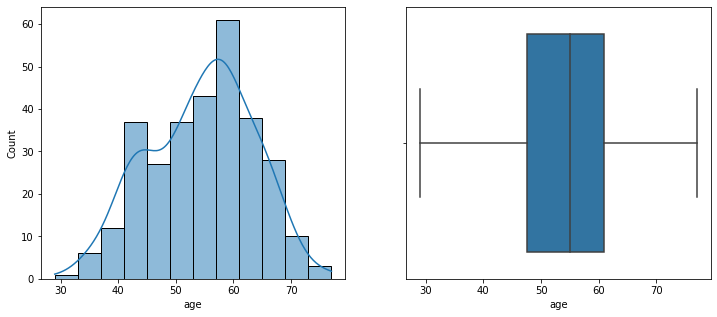

In [10]:
plot_hist_box('age')

### 2. Cholesterol Level

Total cholesterol levels less than 200 milligrams per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high.

In [11]:
# 50% of the data sample shows high cholestrol level (>=240mg/dL)
df['chol'].describe()

count    303.000000
mean     246.264026
std       51.830751
min      126.000000
25%      211.000000
50%      240.000000
75%      274.500000
max      564.000000
Name: chol, dtype: float64

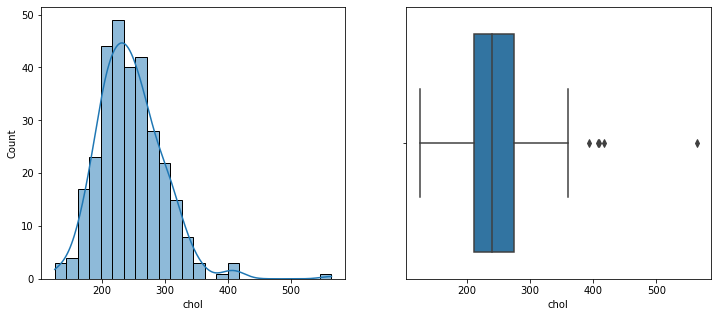

In [12]:
plot_hist_box('chol')

In [13]:
df.sort_values('chol').tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1


In [14]:
q1,q3 = np.percentile(df['chol'],[25,75])
max = q3+(q3-q1)*1.5 
min = q1-(q3-q1)*1.5 
print (max)
print (min)

369.75
115.75


In [15]:
df[df['chol']>max]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
28,65,0,2,140,417,1,0,157,0,0.8,2,1,2,1
85,67,0,2,115,564,0,0,160,0,1.6,1,0,3,1
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2,1
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3,0
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3,0


In [16]:
# I couldn't find a source to indicate max cholestrol level possible. Therefore, i will limit it at 400 
print("number of observation with cholestrol level more than {} is".format(max), df[df['chol']>max].shape[0])
print("number of observation with cholestrol level more than 400 is {}".format(df[df['chol']>500].shape[0]))

number of observation with cholestrol level more than 369.75 is 5
number of observation with cholestrol level more than 400 is 1


In [17]:
df = df.drop(df[df['chol']>400].index)
df.shape

(299, 14)

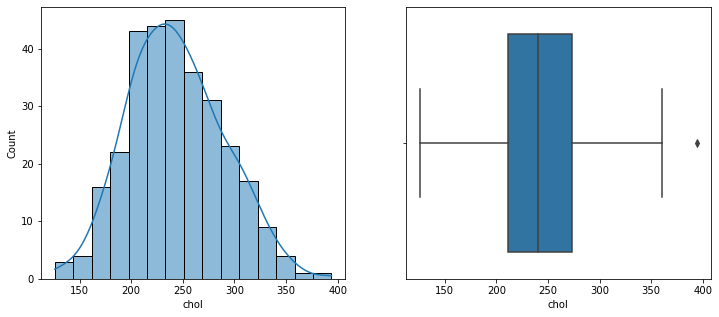

In [18]:
# after removing outliers
plot_hist_box('chol')

### 3. Resting blood pressure 

Maximum blood pressure values of 120/80 when physically at rest are considered ideal for an adult. Blood pressure levels up to 139/89 are within the normal range that do not pose any health risk. A blood pressure reading above 180/120 mm Hg indicates a serious health problem. The AHA refers to these high measurements as a “hypertensive crisis.” Blood pressure in this range requires urgent treatment even if there are no accompanying symptoms.

In [19]:
# 75% of the sample show high blood pressure >=140
df['trestbps'].describe()

count    299.000000
mean     131.581940
std       17.589726
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

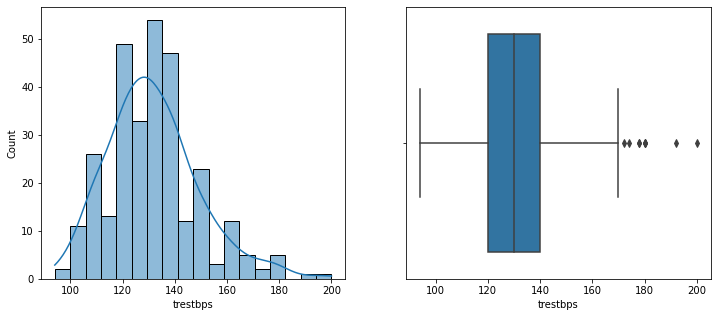

In [20]:
plot_hist_box('trestbps')

In [21]:
df.sort_values('trestbps').tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0


In [22]:
q1,q3 = np.percentile(df['trestbps'],[25,75])
max = q3+(q3-q1)*1.5 
min = q1-(q3-q1)*1.5 
print (max)
print (min)

170.0
90.0


In [23]:
df[df['trestbps']>max]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
101,59,1,3,178,270,0,0,145,0,4.2,0,0,3,1
110,64,0,0,180,325,0,1,154,1,0.0,2,0,2,1
203,68,1,2,180,274,1,0,150,1,1.6,1,0,3,0
223,56,0,0,200,288,1,0,133,1,4.0,0,2,3,0
241,59,0,0,174,249,0,1,143,1,0.0,1,0,2,0
248,54,1,1,192,283,0,0,195,0,0.0,2,1,3,0
260,66,0,0,178,228,1,1,165,1,1.0,1,2,3,0
266,55,0,0,180,327,0,2,117,1,3.4,1,0,2,0


In [24]:
print("number of observation with resting blood pressure more than {} is".format(max), df[df['trestbps']>max].shape[0])
print("number of observation with resting blood pressure more than 200 is", df[df['trestbps']>200].shape[0])

number of observation with resting blood pressure more than 170.0 is 9
number of observation with resting blood pressure more than 200 is 0


### 4. Maximum heart rate achieved

Maximum heart rate (HR) is important when interpreting adequacy of physiologic stress during exercise testing, assessing chronotropic response, and prescribing an exercise training regimen

In [25]:
df['thalach'].describe()

count    299.000000
mean     149.571906
std       23.045127
min       71.000000
25%      133.000000
50%      152.000000
75%      166.500000
max      202.000000
Name: thalach, dtype: float64

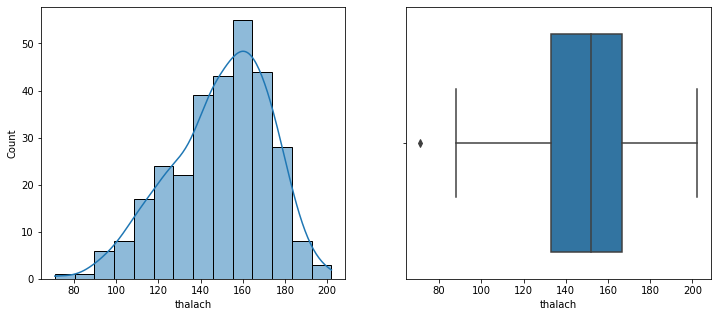

In [26]:
plot_hist_box('thalach')

In [27]:
df.sort_values('thalach').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0
243,57,1,0,152,274,0,1,88,1,1.2,1,1,3,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
262,53,1,0,123,282,0,1,95,1,2.0,1,2,3,0
136,60,0,2,120,178,1,1,96,0,0.0,2,0,2,1


In [28]:
q1,q3 = np.percentile(df['thalach'],[25,75])
max = q3+(q3-q1)*1.5 
min = q1-(q3-q1)*1.5 
print (max)
print (min)

216.75
82.75


In [29]:
print("number of observation with max heart rate less than {} is".format(min), df[df['thalach']<min].shape[0])

number of observation with max heart rate less than 82.75 is 1


In [30]:
df[df['thalach']<min]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
272,67,1,0,120,237,0,1,71,0,1.0,1,0,2,0


In [31]:
df = df.drop(df[df['thalach']<min].index)
df.shape

(298, 14)

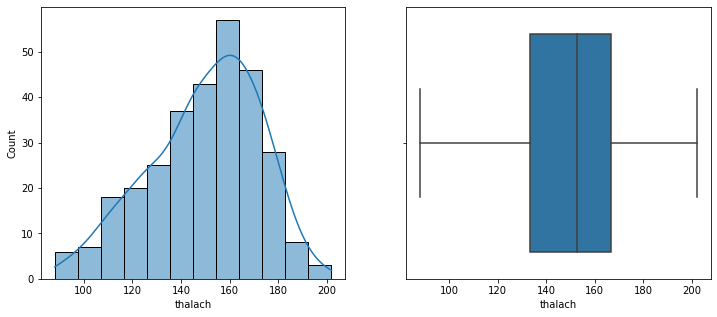

In [32]:
plot_hist_box('thalach')

### 5. ST depression 

Normal (physiological) ST segment depressions occur during physical exercise. These ST segment depressions have an upsloping ST segment. The depression in the J 60 point is usually <1 mm and they resolve rapidly once the exercise is stopped.

In [33]:
df['oldpeak'].describe()

count    298.000000
mean       1.025839
std        1.156436
min        0.000000
25%        0.000000
50%        0.650000
75%        1.600000
max        6.200000
Name: oldpeak, dtype: float64

In [34]:
df.groupby(['slope'])['oldpeak'].count()

slope
0     21
1    136
2    141
Name: oldpeak, dtype: int64

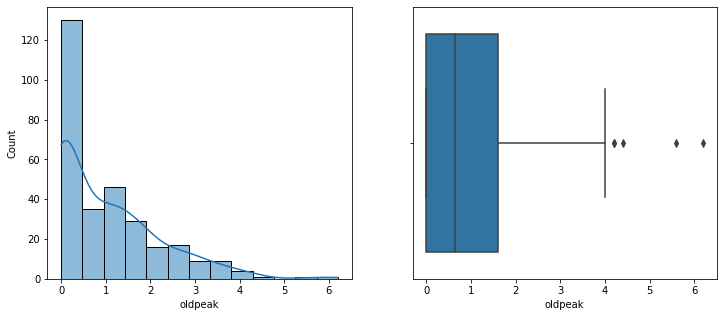

In [35]:
plot_hist_box('oldpeak')

In [36]:
df.sort_values('oldpeak').head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0
127,67,0,2,152,277,0,1,172,0,0.0,2,1,2,1
130,54,0,2,160,201,0,1,163,0,0.0,2,1,2,1
73,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
72,29,1,1,130,204,0,0,202,0,0.0,2,0,2,1


In [37]:
# oldpeak value for 33% of the sample is Zero
(df['oldpeak']==0).sum() / df.shape[0] * 100

33.22147651006711

In [38]:
#df['oldpeak'] = df['oldpeak'].apply(lambda x: np.nan if x==0 else x)

### *Data Exploring of the Categorical Fields*

In [39]:
# adjusting categorical data to make it more readable
df2 = df.copy()
df2['sex'] = df2['sex'].map({0:'Female',1:'Male'})
df2['target'] = df2['target'].map({1:'No heart disease',0:'Heart disease'})
df2['cp'] = df2['cp'].map({0: 'asymptomatic', 1: 'atypical angina', 2: 'non-anginal pain', 3: 'typical angina'})
df2['thal'] = df2['thal'].map({0: 'none', 1: 'fixed defect', 2: 'normal blood flow', 3: 'reversible defect'})
df2['fbs'] = df2['fbs'].map({0: '<= 120 mg/dl', 1: '> 120 mg/dl'})
df2['restecg'] = df2['restecg'].map({0:'left ventricular hypertrophy',1: 'normal', 2: 'ST-T wave abnormality'})
df2['exang'] = df2['exang'].map({0:'no',1: 'yes'})
df2['slope'] = df2['slope'].map({0: "downsloping", 1: "flat", 2: "upsloping"})

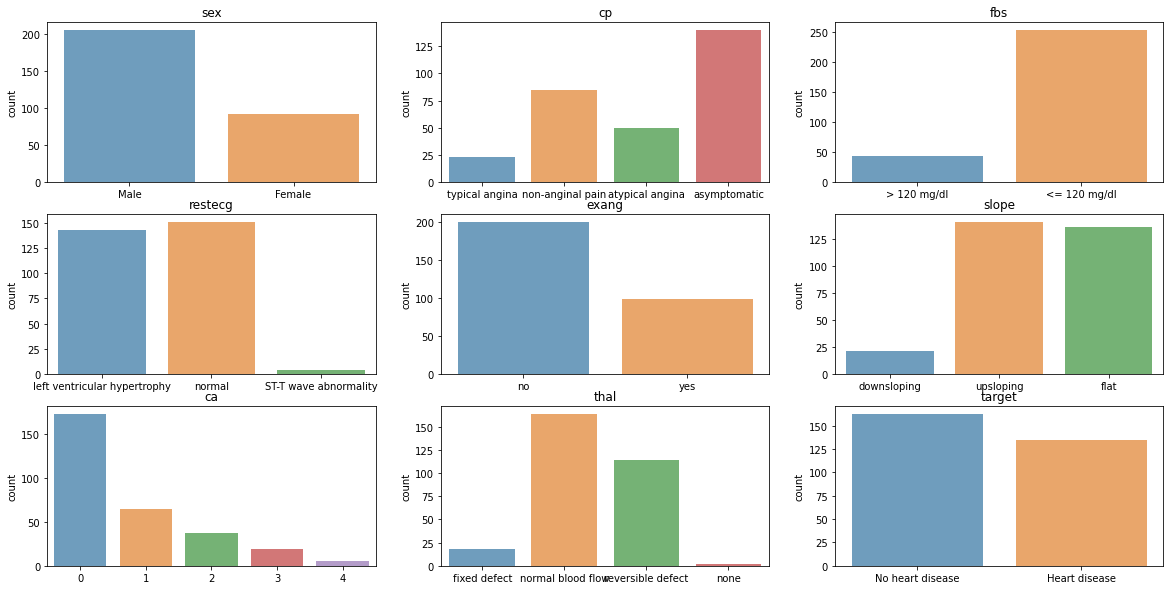

In [40]:
fig, axes = plt.subplots(nrows=len(ccol)//3,ncols=3, figsize=(20,10), sharex=False, sharey=False)
x=0
for i, col in enumerate(ccol):
    sns.countplot (x=col, data=df2, ax=axes[i//3,x], alpha=0.7)
    axes[i//3,x].set_xlabel("")
    axes[i//3,x].set_title(col)
    
    x+=1
    if (x==3):
        x=0

In [41]:
# based on data definintion, ca - the number of major vessels - can take the values 0–3
df['ca'].value_counts()

0    173
1     64
2     37
3     19
4      5
Name: ca, dtype: int64

In [42]:
df = df.drop(df[df['ca']==4].index)
df2 = df2.drop(df2[df2['ca']==4].index)
df.shape

(293, 14)

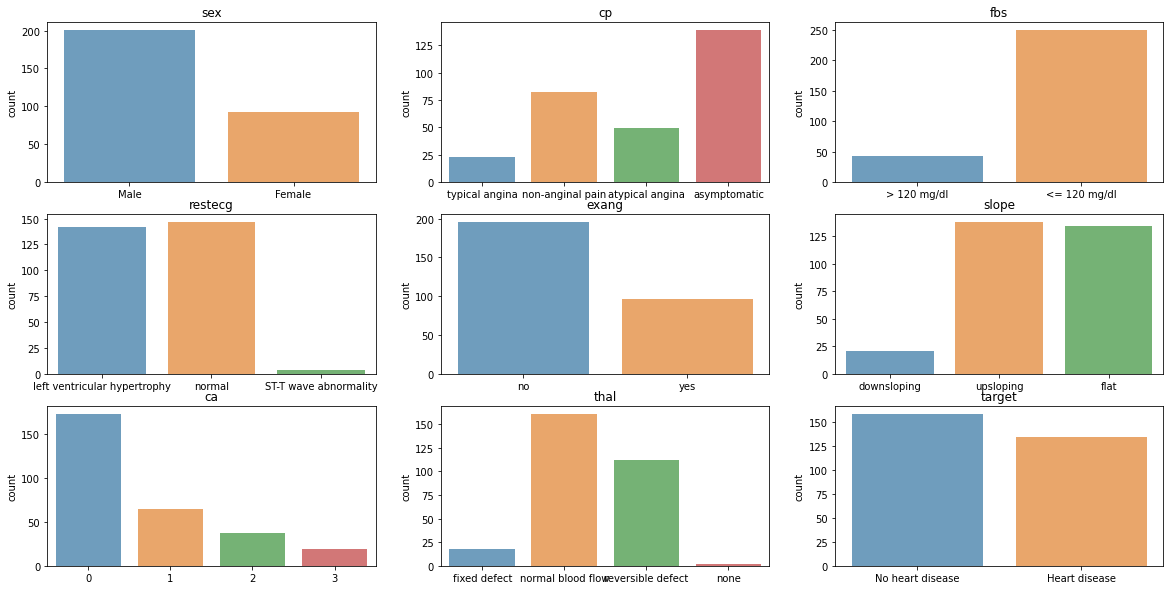

In [43]:
fig, axes = plt.subplots(nrows=len(ccol)//3,ncols=3, figsize=(20,10), sharex=False, sharey=False)
x=0
for i, col in enumerate(ccol):
    sns.countplot (x=col, data=df2, ax=axes[i//3,x], alpha=0.7)
    axes[i//3,x].set_xlabel("")
    axes[i//3,x].set_title(col)
    
    x+=1
    if (x==3):
        x=0

## 2. Data Visualization

### 1. Heart Disease by Age and Gender 

Studies suggest that cardiovascular disease develops 7 to 10 years later in women than in men and is still the major cause of death in women. The risk of heart disease in women is often underestimated due to the misperception that females are ‘protected’ against cardiovascular disease. 

In [44]:
# Ratio of males and females in the sample data - 69% of the sammple is men vs. 31% are women
df2['sex'].value_counts(normalize=True)

Male      0.686007
Female    0.313993
Name: sex, dtype: float64

In [45]:
# Ratio of patients with heart disease among males and females 
# 55% of men in the dataset are having heart disease compared to 23% of women
df2.groupby('sex')['target'].value_counts(normalize=True).sort_index()

sex     target          
Female  Heart disease       0.239130
        No heart disease    0.760870
Male    Heart disease       0.557214
        No heart disease    0.442786
Name: target, dtype: float64

Text(0.5, 1.0, 'Gender vs. Target')

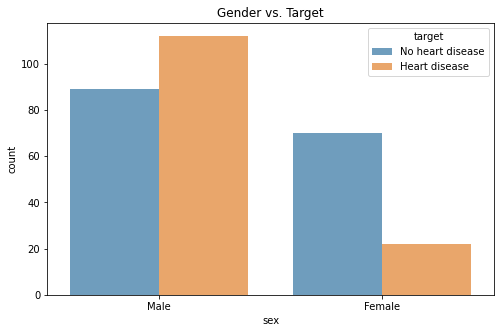

In [46]:
plt.figure (figsize=(8,5))
sns.countplot(x='sex', data=df2, hue='target', alpha=0.7)
plt.title("Gender vs. Target")

<AxesSubplot:xlabel='target', ylabel='age'>

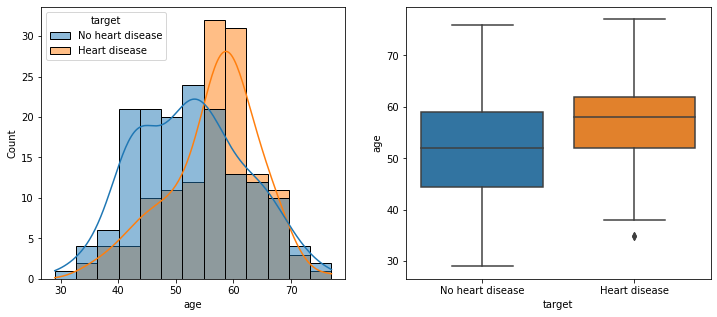

In [47]:
# the mean age of the people with heart disease is higher than those with no heart disease
# this means that the risk of developing heart disease increases with aging
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
sns.histplot (ax = axes[0] ,x= 'age', data=df2, kde=True, hue='target')
sns.boxplot (ax = axes[1], y='age', data=df2, x='target')

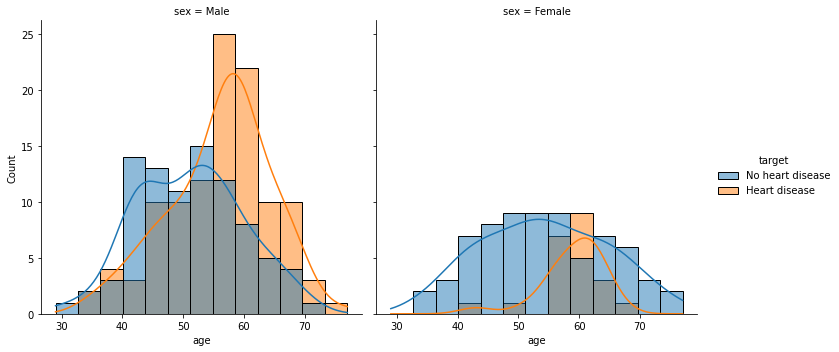

In [48]:
# older rmen and women are having higher risk of developing heart disease especially in thier sixties
axes = sns.displot (x= 'age', data=df2, kde=True, hue='target', col='sex')

Text(0.5, 1.0, 'sex = Female')

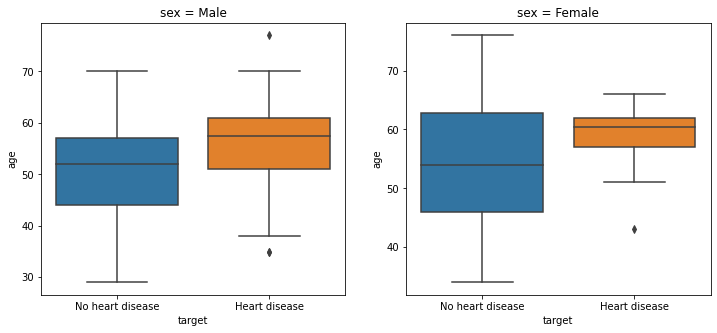

In [49]:
# the mean age for men and women developing heart disease is around their sixties
# but the sample also indicates that that the age range for men developing heart diseases is wider than for women
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
sns.boxplot (ax = axes[0], y='age', data=df2[df2['sex']=='Male'], x='target')
sns.boxplot (ax = axes[1], y='age', data=df2[df2['sex']=='Female'], x='target')
axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')

### 2. Hear Disease vs. Chest Pain

Men often describe their chest pain during a heart attack as a crushing weight on the chest. Some women also experience chest pain, but they are more likely to have different, subtler symptoms for three or four weeks before a heart attack. 

In [50]:
df2['cp'].value_counts(normalize=True)

asymptomatic        0.474403
non-anginal pain    0.279863
atypical angina     0.167235
typical angina      0.078498
Name: cp, dtype: float64

In [51]:
# 75% of people with heart diseases are having asymptomatic chest pain while the rest are suffering anginal, non-anginal or typical pain 
# while 40% with no heart disease have non-anginal pain and 25% having atypical angina    
df2.groupby('target')['cp'].value_counts(normalize=True)

target            cp              
Heart disease     asymptomatic        0.746269
                  non-anginal pain    0.134328
                  atypical angina     0.067164
                  typical angina      0.052239
No heart disease  non-anginal pain    0.402516
                  atypical angina     0.251572
                  asymptomatic        0.245283
                  typical angina      0.100629
Name: cp, dtype: float64

Text(0.5, 1.0, 'Chest Pain vs. Target')

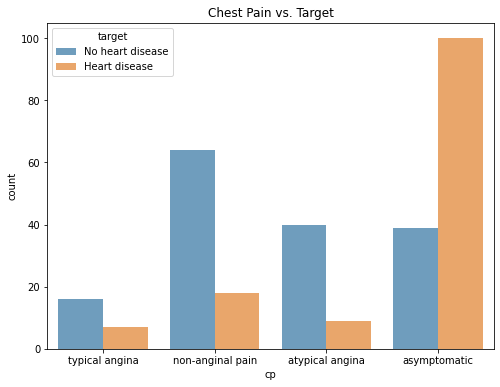

In [52]:
plt.figure (figsize=(8,6))
sns.countplot(x='cp', data=df2, hue='target', alpha=0.7)
plt.title("Chest Pain vs. Target")

Text(0.5, 1.0, 'sex = Female')

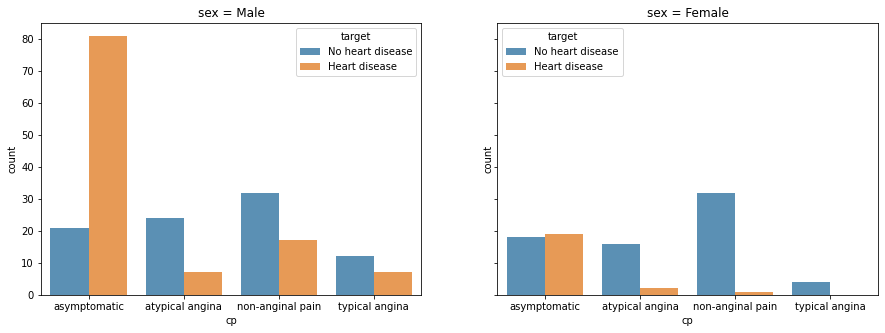

In [53]:
# majority men and women with heart disease are asymptomatic 
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=True)
sns.countplot(x='cp', data=df2[df2['sex']=='Male'], hue='target', order=sorted(df2['cp'].unique()) ,alpha=0.8, ax=axes[0])
sns.countplot(x='cp', data=df2[df2['sex']=='Female'], hue='target',  order=sorted(df2['cp'].unique()), alpha=0.8, ax=axes[1])
axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')
#plt.title("Chest Pain vs. Target")

### 3. Fasting blood sugar

Studies suggest that high blood glucose from diabetes can damage blood vessels and the nerves that control heart and blood vessels. The longer a person have diabetes, the higher the chances that he/she will develop heart disease.

In [54]:
# 85% of the sample doesn't have high suger level 
df2['fbs'].value_counts(normalize=True)

<= 120 mg/dl    0.853242
> 120 mg/dl     0.146758
Name: fbs, dtype: float64

In [55]:
# 84% of the people with heart disease don't suffer from have high blood suger
df2.groupby('target')['fbs'].value_counts(normalize=True)

target            fbs         
Heart disease     <= 120 mg/dl    0.843284
                  > 120 mg/dl     0.156716
No heart disease  <= 120 mg/dl    0.861635
                  > 120 mg/dl     0.138365
Name: fbs, dtype: float64

Text(0.5, 1.0, 'Blood Suger vs. Target')

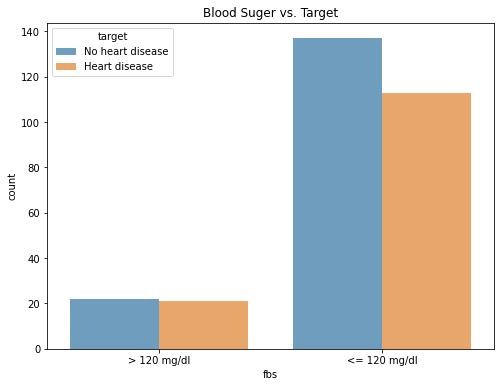

In [56]:
plt.figure (figsize=(8,6))
sns.countplot(x='fbs', data=df2, hue='target', alpha=0.7)
plt.title("Blood Suger vs. Target")

Text(0.5, 1.0, 'sex = Female')

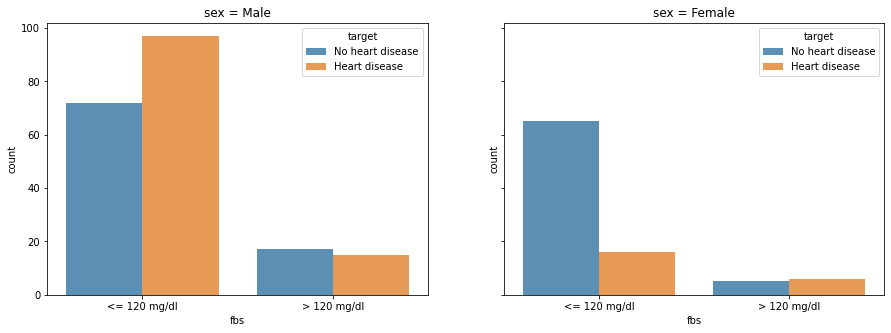

In [57]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=True)
sns.countplot(x='fbs', data=df2[df2['sex']=='Male'], hue='target', alpha=0.8, order=sorted(df2['fbs'].unique()), ax=axes[0])
sns.countplot(x='fbs', data=df2[df2['sex']=='Female'], hue='target', alpha=0.8, order=sorted(df2['fbs'].unique()), ax=axes[1])
axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')
#plt.title("Chest Pain vs. Target")

### 4. Thalassemia

In severe beta thalassemia, both anemia and iron overload can damage the heart and cause problems like: Fast heartbeat. Abnormal heartbeat called arrhythmia. Congestive heart failure, when the heart can't pump enough blood.

In [58]:
# 55% of the sample have normal blood flow
df2['thal'].value_counts(normalize=True)

normal blood flow    0.549488
reversible defect    0.382253
fixed defect         0.061433
none                 0.006826
Name: thal, dtype: float64

In [59]:
# 64% of people with heart disease have reversible defect
df2.groupby('target')['thal'].value_counts(normalize=True)

target            thal             
Heart disease     reversible defect    0.641791
                  normal blood flow    0.261194
                  fixed defect         0.089552
                  none                 0.007463
No heart disease  normal blood flow    0.792453
                  reversible defect    0.163522
                  fixed defect         0.037736
                  none                 0.006289
Name: thal, dtype: float64

Text(0.5, 1.0, 'Thalassemia vs. Target')

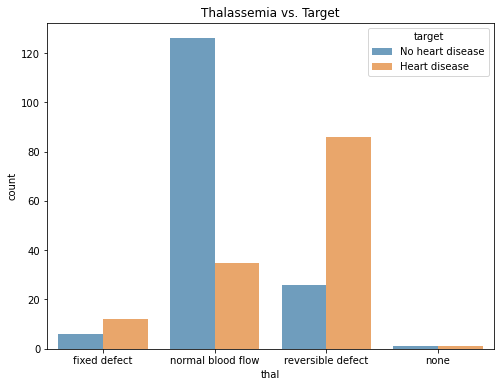

In [60]:
plt.figure (figsize=(8,6))
sns.countplot(x='thal', data=df2, hue='target', alpha=0.7)
plt.title("Thalassemia vs. Target")

Text(0.5, 1.0, 'sex = Female')

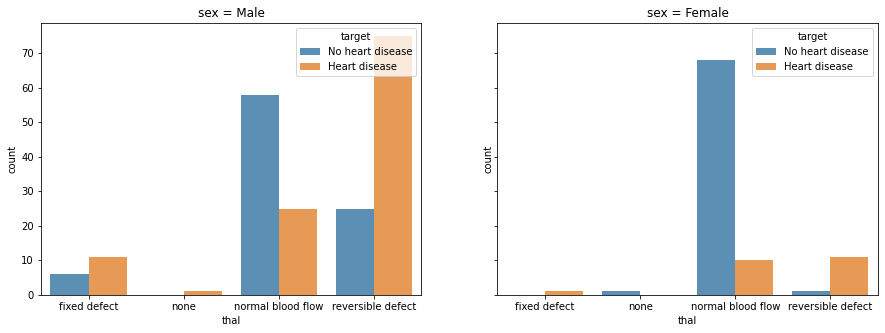

In [61]:
# majority of men with heart diseases have reversible defect 
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=True)
sns.countplot(x='thal', data=df2[df2['sex']=='Male'], hue='target', alpha=0.8, order=sorted(df2['thal'].unique()), ax=axes[0])
sns.countplot(x='thal', data=df2[df2['sex']=='Female'], hue='target', alpha=0.8, order=sorted(df2['thal'].unique()), ax=axes[1])
axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')
#plt.title("Chest Pain vs. Target")

### 6. Cholestrol Level

<AxesSubplot:xlabel='target', ylabel='chol'>

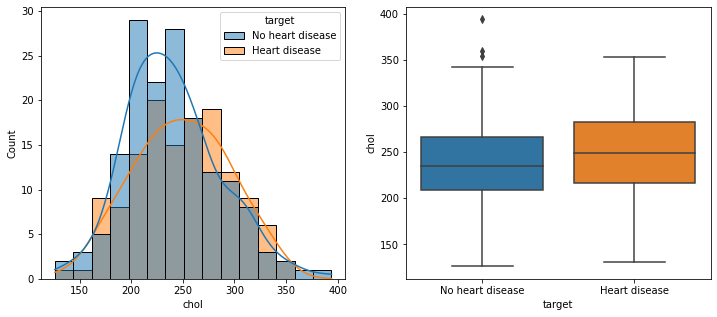

In [62]:
# the mean value of cholestrol level for people suffering heart diseases is higher 
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
sns.histplot (ax = axes[0] ,x= 'chol', data=df2, kde=True, hue='target')
sns.boxplot (ax = axes[1], y='chol', data=df2, x='target')

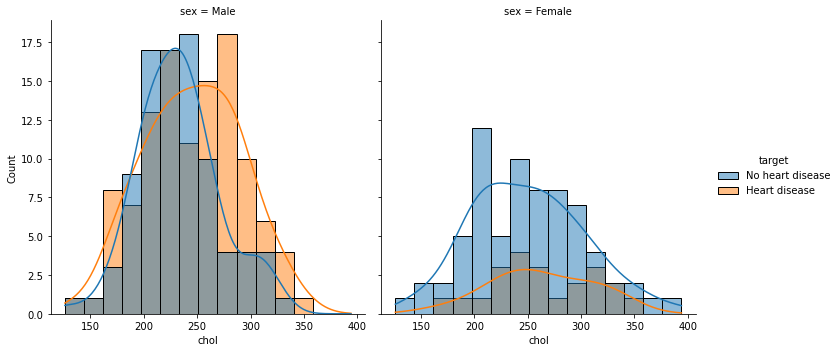

In [63]:
# men with heart diseases are having higher cholestrol level 
axes = sns.displot (x= 'chol', data=df2, kde=True, hue='target', col='sex')

<AxesSubplot:xlabel='target', ylabel='chol'>

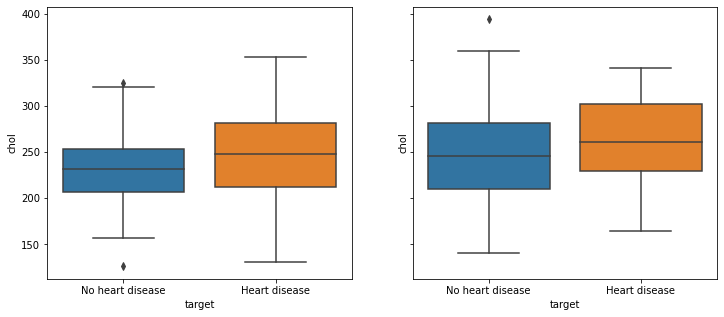

In [64]:
# the mean value of cholestrol level for patients with heart disease is higher than those with no heart disease
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=True)
sns.boxplot (ax = axes[0], y='chol', data=df2[df2['sex']=='Male'], x='target')
sns.boxplot (ax = axes[1], y='chol', data=df2[df2['sex']=='Female'], x='target')

### 7. Resting blood pressure

<AxesSubplot:xlabel='target', ylabel='trestbps'>

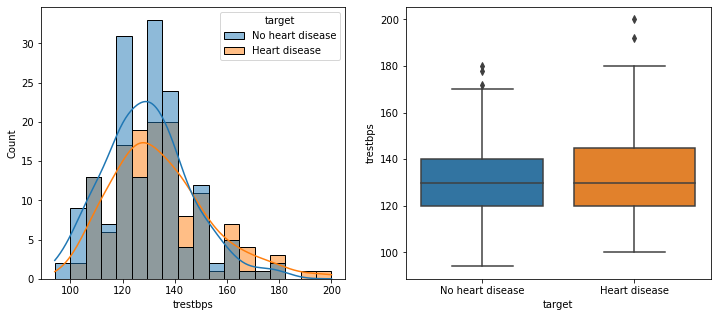

In [65]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
sns.histplot (ax = axes[0] ,x= 'trestbps', data=df2, kde=True, hue='target')
sns.boxplot (ax = axes[1], y='trestbps', data=df2, x='target')

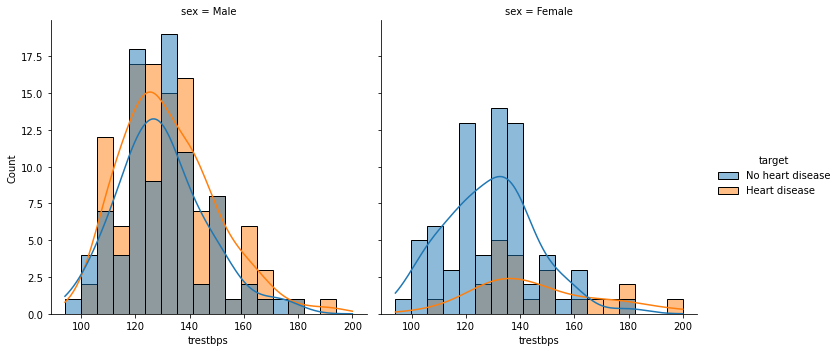

In [66]:
axes = sns.displot (x= 'trestbps', data=df2, kde=True, hue='target', col='sex')

<AxesSubplot:xlabel='target', ylabel='trestbps'>

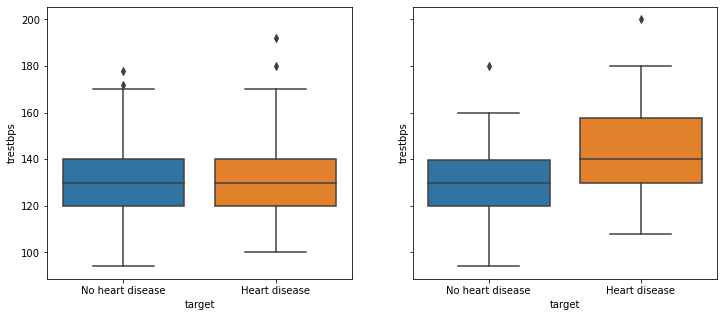

In [67]:
# women with heart disease tend to have higher blood pressure in the sample 
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=True)
sns.boxplot (ax = axes[0], y='trestbps', data=df2[df2['sex']=='Male'], x='target')
sns.boxplot (ax = axes[1], y='trestbps', data=df2[df2['sex']=='Female'], x='target')

### 8. Maximum heart rate 

<AxesSubplot:xlabel='target', ylabel='thalach'>

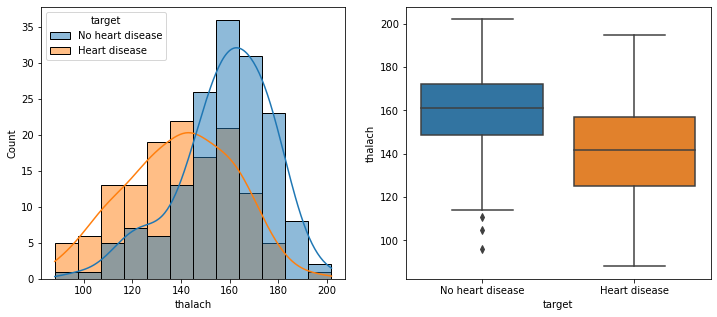

In [68]:
# people with heart disease tend to have lower maximum heart rate acheived
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=False)
sns.histplot (ax = axes[0] ,x= 'thalach', data=df2, kde=True, hue='target')
sns.boxplot (ax = axes[1], y='thalach', data=df2, x='target')

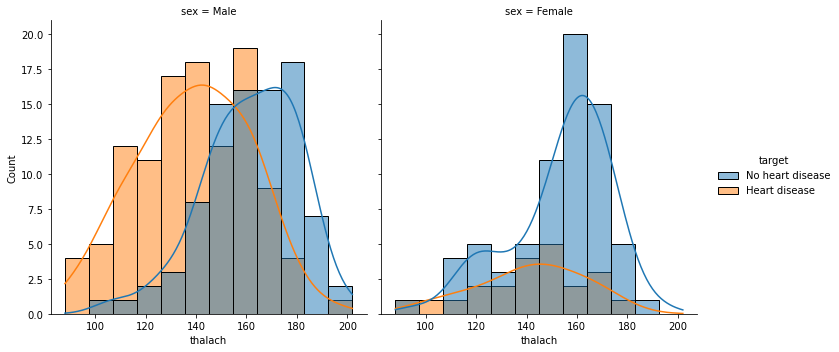

In [69]:
axes = sns.displot (x= 'thalach', data=df2, kde=True, hue='target', col='sex')

<AxesSubplot:xlabel='target', ylabel='thalach'>

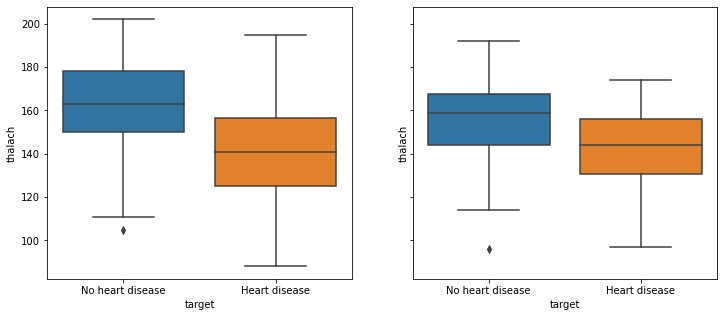

In [70]:
# heart disease patients have lower 'maximum heart rate' for both men and women in the sample
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(12,5), sharex=False, sharey=True)
sns.boxplot (ax = axes[0], y='thalach', data=df2[df2['sex']=='Male'], x='target')
sns.boxplot (ax = axes[1], y='thalach', data=df2[df2['sex']=='Female'], x='target')

### 9. Bivariate distributions 

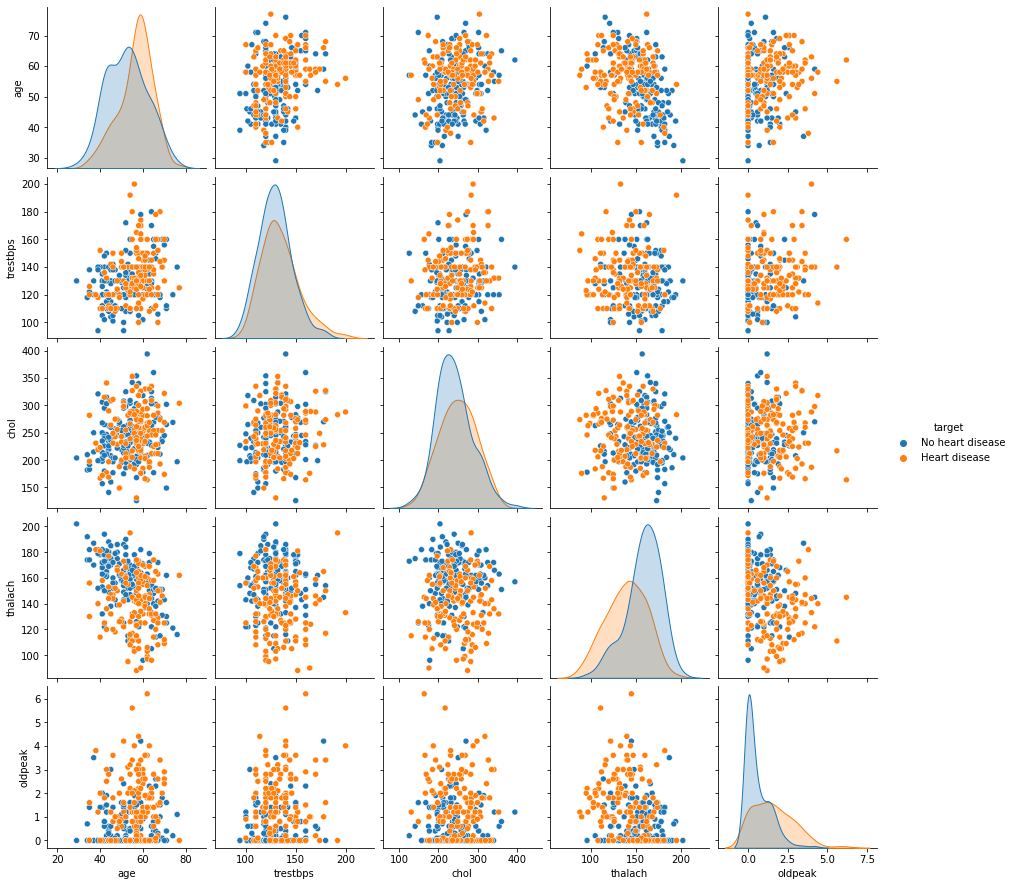

In [71]:
sns.pairplot(vars=ncol, data=df2, hue="target")

## 3. Data Correlation

Correlation indicates how the features are related to each other or to the target variable.
The correlation may be positive (increase in one value of the feature increases the value of the target variable) or negative (increase in one value of the feature decreases the value of the target variable)
Heatmap makes it easy to classify the features are most relevant to the target variable.

In [72]:
corr = df.corr()
corr

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
age,1.000000,-0.076296,-0.062838,0.295485,0.171402,0.128360,-0.106068,-0.393882,0.109283,0.194296,-0.159039,0.370834,0.061846,-0.227250
sex,-0.076296,1.000000,-0.053069,-0.054783,-0.132088,0.051989,-0.088546,-0.038514,0.147785,0.127233,-0.038760,0.112553,0.230775,-0.296334
cp,-0.062838,-0.053069,1.000000,0.048201,-0.091733,0.099114,0.036570,0.283861,-0.388703,-0.137975,0.103514,-0.219231,-0.154101,0.417663
trestbps,0.295485,-0.054783,0.048201,1.000000,0.147391,0.178735,-0.114134,-0.059563,0.069637,0.192869,-0.130278,0.090905,0.065343,-0.146885
chol,0.171402,-0.132088,-0.091733,0.147391,1.000000,-0.001605,-0.101706,-0.019551,0.084105,0.002567,0.024074,0.105871,0.062945,-0.094154
fbs,0.128360,0.051989,0.099114,0.178735,-0.001605,1.000000,-0.068740,-0.009437,0.015669,0.015075,-0.064980,0.149213,-0.034703,-0.025836
restecg,-0.106068,-0.088546,0.036570,-0.114134,-0.101706,-0.068740,1.000000,0.050811,-0.059504,-0.041232,0.084995,-0.098848,0.004115,0.128829
thalach,-0.393882,-0.038514,0.283861,-0.059563,-0.019551,-0.009437,0.050811,1.000000,-0.392135,-0.354529,0.382935,-0.282761,-0.101078,0.415834
exang,0.109283,0.147785,-0.388703,0.069637,0.084105,0.015669,-0.059504,-0.392135,1.000000,0.296691,-0.254627,0.143886,0.203317,-0.431474
oldpeak,0.194296,0.127233,-0.137975,0.192869,0.002567,0.015075,-0.041232,-0.354529,0.296691,1.000000,-0.579431,0.278680,0.202484,-0.427372


<AxesSubplot:>

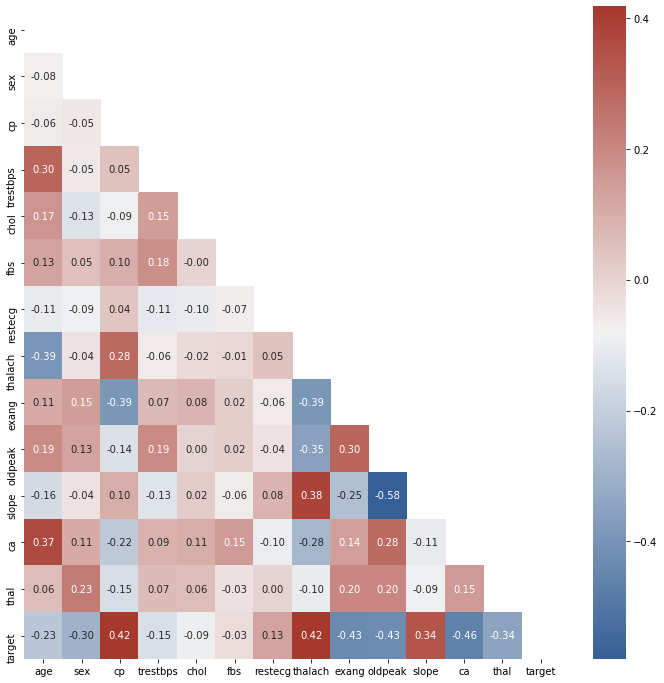

In [73]:
mask = np.triu(np.ones_like(corr,dtype=bool))
cmap = sns.diverging_palette(250,15,s=75,l=40, n=9, center='light', as_cmap=True)
fig = plt.figure(figsize=(12,12))
sns.heatmap(corr, mask=mask, cmap=cmap, annot=True, fmt='.2f')
#sns.heatmap(corr, cmap=cmap, annot=True, fmt='.2f')

From this heatmap we can observe that the chest pain (cp) and maximum heart rate (thalach) both have high postive relationship with the target variable. Based on that, we can say that chest pain contributes the most in prediction of presences of a heart disease followed by maximum heart rate. 

<AxesSubplot:title={'center':'Relationship between Target and Factors (in absolute)'}>

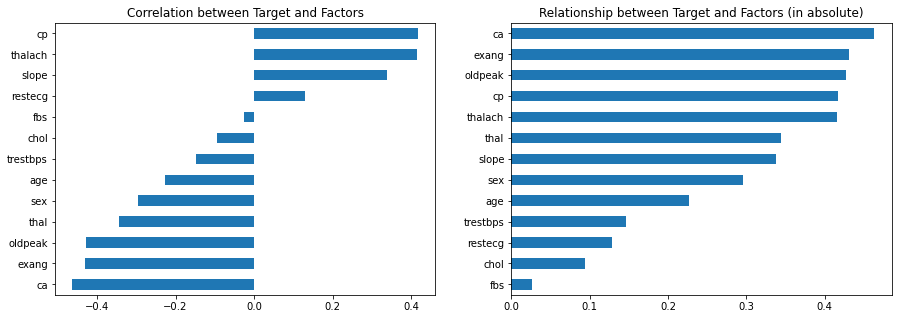

In [74]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=False)
corr['target'][:-1].sort_values().plot(kind='barh', ax=axes[0],title= 'Correlation between Target and Factors')
abs(corr['target'][:-1]).sort_values().plot(kind='barh' , ax=axes[1],title= 'Relationship between Target and Factors (in absolute)')

Text(0.5, 1.0, 'Correlation Heatmap for Females')

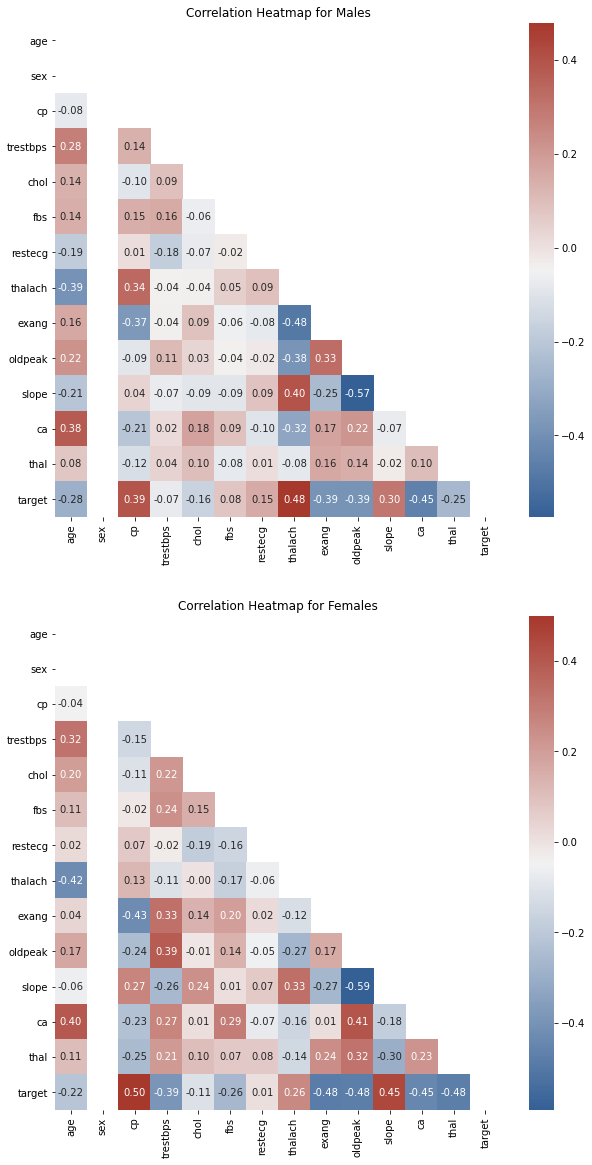

In [75]:
corr_m = df[df['sex']==1].corr()
corr_w = df[df['sex']==0].corr()

mask_m = np.triu(np.ones_like(corr_m,dtype=bool))
mask_w = np.triu(np.ones_like(corr_w,dtype=bool))

cmap = sns.diverging_palette(250,15,s=75,l=40, n=9, center='light', as_cmap=True)

fig, axes = plt.subplots(nrows=2,ncols=1, figsize=(10,20), sharex=False, sharey=False)
sns.heatmap(corr_m, mask=mask_m, cmap=cmap, annot=True, fmt='.2f', ax=axes[0])
sns.heatmap(corr_w, mask=mask_w, cmap=cmap, annot=True, fmt='.2f', ax=axes[1])

axes[0].set_title('Correlation Heatmap for Males')
axes[1].set_title('Correlation Heatmap for Females')


From this heatmap, we can observe that the maximum heart rate (thalach) and chest pain (cp), maximum heart rate (thalach) followed slope of the peak exercise (slope) have high postive relationship with the target variable for both men and women although the strength and importance in relationship is not the same

<AxesSubplot:title={'center':'Correlation between Target and Factors for Females'}>

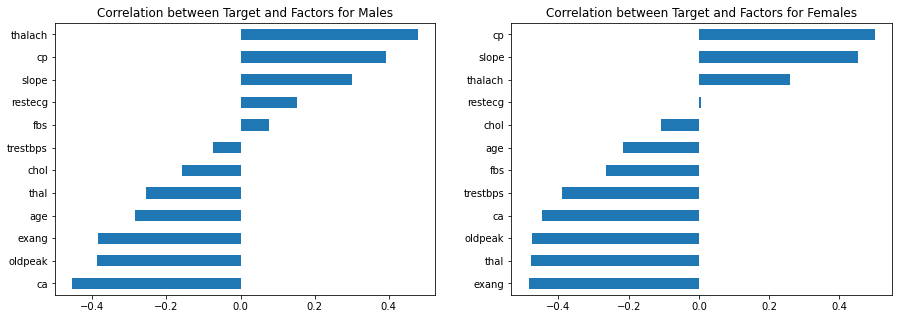

In [76]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=False)
corr_m[(corr_m['target'].index!='target') & (corr_m['target'].index!='sex')]['target'].sort_values().plot(kind='barh', ax=axes[0],title= 'Correlation between Target and Factors for Males')
corr_w[(corr_w['target'].index!='target') & (corr_w['target'].index!='sex')]['target'].sort_values().plot(kind='barh', ax=axes[1],title= 'Correlation between Target and Factors for Females')

## 4. Data Distribution

In [77]:
# prepare function to generate Emperical CDF, Theoretical CDF and plot the charts 
def cdf(data):
    # generate Empirical CDF
    x = np.sort(data)
    y = np.arange (1,len(x)+1) / len(x)  
    return x,y

def theor_cdf(data, size):
    # generate Theoretical CDF
    mean = np.mean(data)
    std = np.std(data)
    np.random.seed(42)
    sample = np.random.normal(mean,std,size)
    return cdf(sample)

def plot_cdf(data, color='C0'):
    # plotting the Empirical CDF
    x1,y1 = cdf(data)
    plt.plot(x1,y1,marker='.',color=color, linestyle='none')
    plt.axvline(np.mean(data), color=color, linestyle='--')

    #plotting Theoretical CDF
    x11, y11 = theor_cdf(data, 1000)
    plt.plot(x11,y11, color=color)
    
def plot_ppf(data, color='C0', normed=True):
    sns.histplot(data, color=color,kde=True)
#    plt.axvline(np.mean(data), color=color, linestyle='--')

### 1. Age

'Age' data is normally distributed with mean value of 54.35 and standard deviation of  9.01


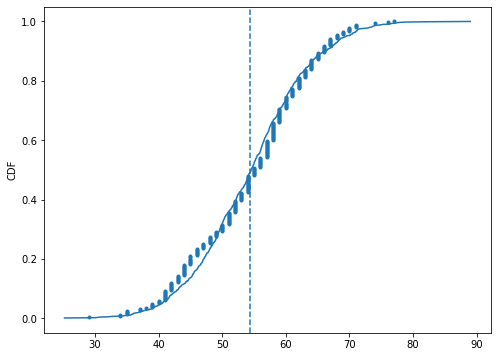

In [78]:
plt.figure(figsize=(8,6))
plot_cdf(df['age'],'C0')
plt.ylabel('Age')
plt.ylabel('CDF')

print (f"'Age' data is normally distributed with mean value of {df['age'].mean():5.2f} and standard deviation of {df['age'].std():5.2f}")

'Age' mean value for men is 53.89 while for women is 55.37
'Age' difference in mean value between men and women is -1.48


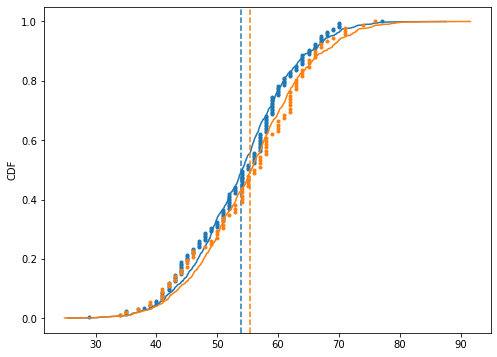

In [79]:
plt.figure(figsize=(8,6))
plot_cdf(df[df['sex']==1]['age'],'C0')
plot_cdf(df[df['sex']==0]['age'],'C1')
plt.ylabel('Age')
plt.ylabel('CDF')

print (f"'Age' mean value for men is {df[df['sex']==1]['age'].mean():5.2f} while for women is {df[df['sex']==0]['age'].mean():5.2f}")
print (f"'Age' difference in mean value between men and women is {df[df['sex']==1]['age'].mean()- df[df['sex']==0]['age'].mean():5.2f}")

### 2. Cholestrol Level

'Cholestrol' data is normally distributed with mean value of 244.18 and standard deviation of 45.93


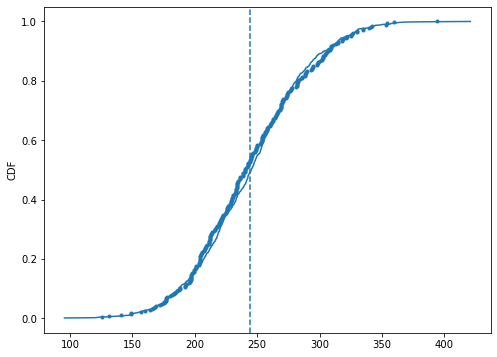

In [80]:
plt.figure(figsize=(8,6))
plot_cdf(df['chol'],'C0')
plt.ylabel('Cholestrol Level')
plt.ylabel('CDF')
print (f"'Cholestrol' data is normally distributed with mean value of {df['chol'].mean():5.2f} and standard deviation of {df['chol'].std():5.2f}")

'Cholestrol' mean value for men is 240.08 while for women is 253.13
'Cholestrol' difference in mean value between men and women is -13.05


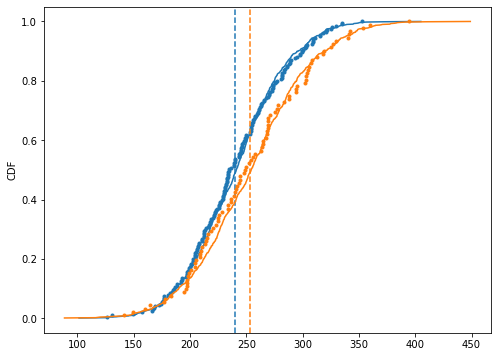

In [81]:
plt.figure(figsize=(8,6))
plot_cdf(df[df['sex']==1]['chol'],'C0')
plot_cdf(df[df['sex']==0]['chol'],'C1')
plt.ylabel('Cholestrol Level')
plt.ylabel('CDF')
print (f"'Cholestrol' mean value for men is {df[df['sex']==1]['chol'].mean():5.2f} while for women is {df[df['sex']==0]['chol'].mean():5.2f}")
print (f"'Cholestrol' difference in mean value between men and women is {df[df['sex']==1]['chol'].mean()- df[df['sex']==0]['chol'].mean():5.2f}")

### 3. Max Heart Rate Achieved

'Maximum heart rate achieved' data is normally distributed with mean value of 149.66 and standard deviation of 22.71


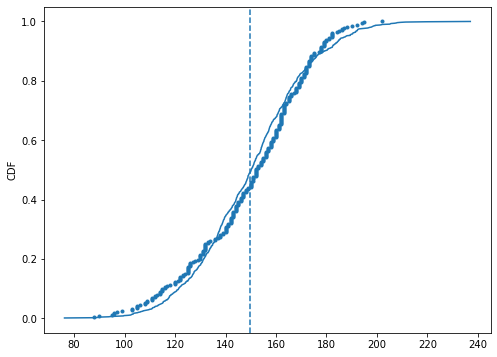

In [82]:
plt.figure(figsize=(8,6))
plot_cdf(df['thalach'],'C0')
plt.ylabel('Maximum heart rate achieved')
plt.ylabel('CDF')
print ("'Maximum heart rate achieved' data is normally distributed with mean value of {:5.2f} and standard deviation of {:5.2f}".format(df['thalach'].mean(), df['thalach'].std()))

'Maximum heart rate' mean value for men is 149.06 while for women is 150.95
'Maximum heart rate' difference in mean value between men and women is -1.88


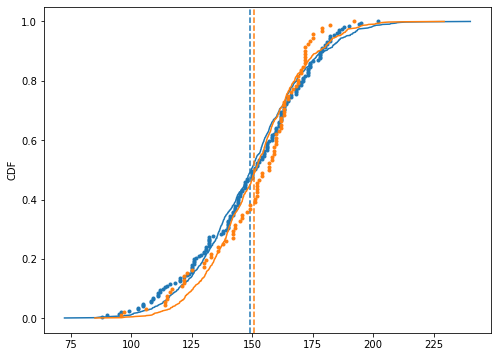

In [83]:
plt.figure(figsize=(8,6))
plot_cdf(df[df['sex']==1]['thalach'],'C0')
plot_cdf(df[df['sex']==0]['thalach'],'C1')
plt.ylabel('Maximum heart rate achieved')
plt.ylabel('CDF')
print (f"'Maximum heart rate' mean value for men is {df[df['sex']==1]['thalach'].mean():5.2f} while for women is {df[df['sex']==0]['thalach'].mean():5.2f}")
print (f"'Maximum heart rate' difference in mean value between men and women is {df[df['sex']==1]['thalach'].mean()- df[df['sex']==0]['thalach'].mean():5.2f}")

Text(0.5, 1.0, 'sex = Female')

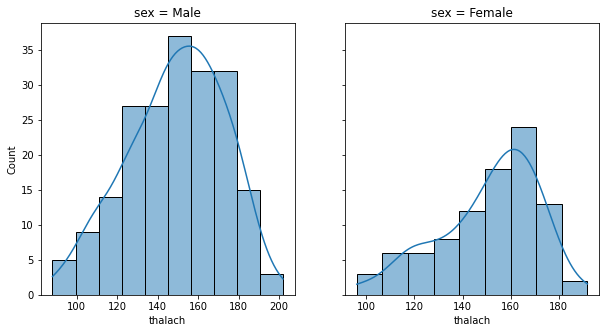

In [84]:
# women's thalach data seems a bit off the CDF line - the data is slightly left skewed based on the histogram
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10,5), sharex=False, sharey=True)
sns.histplot(df[df['sex']==1]['thalach'], kde=True, ax=axes[0])
sns.histplot(df[df['sex']==0]['thalach'], kde=True, ax=axes[1])
axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')

### 4. Resting Blood Pressure

'Blood pressure' data is normally distributed with mean value of 149.66 and standard deviation of 17.74


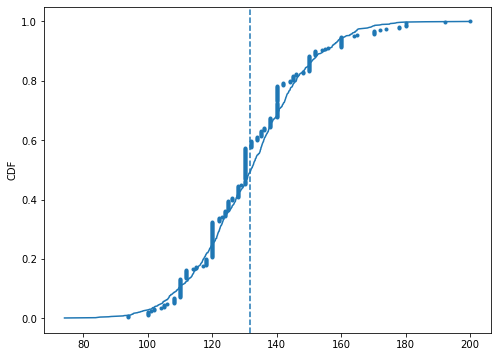

In [85]:
plt.figure(figsize=(8,6))
plot_cdf(df['trestbps'],'C0')
plt.ylabel('Blood pressure')
plt.ylabel('CDF')
print (f"'Blood pressure' data is normally distributed with mean value of {df['thalach'].mean():5.2f} and standard deviation of {df['trestbps'].std():5.2f}")

'Blood pressure' mean value for men is 130.92 while for women is 133.01
'Blood pressure' difference in mean value between men and women is -2.09


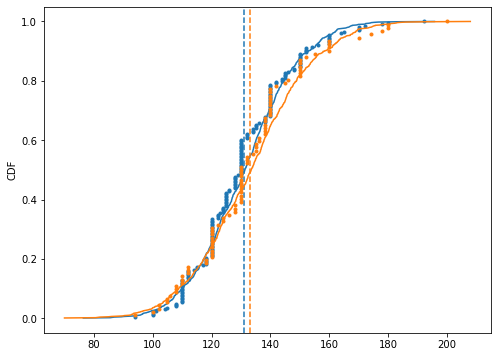

In [86]:
plt.figure(figsize=(8,6))
plot_cdf(df[df['sex']==1]['trestbps'],'C0')
plot_cdf(df[df['sex']==0]['trestbps'],'C1')
plt.ylabel('Blood pressure')
plt.ylabel('CDF')
print (f"'Blood pressure' mean value for men is {df[df['sex']==1]['trestbps'].mean():5.2f} while for women is {df[df['sex']==0]['trestbps'].mean():5.2f}")
print (f"'Blood pressure' difference in mean value between men and women is {df[df['sex']==1]['trestbps'].mean()- df[df['sex']==0]['trestbps'].mean():5.2f}")

In general, the different factors evaluated are normally distributed with minor difference in mean value between men and women. 

## 5. Linear Regression  

Linear regression is the next step up after correlation and it's used when we want to predict the value of a variable based on the value of another variable.

In [87]:
def perm_reps(data1, data2, size):
    # Generate multiple permutation replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        tr_perm = np.random.permutation(np.concatenate([data1,data2]))
        perm_sample_1 = tr_perm[:len(data1)]
        perm_sample_2 = tr_perm[len(data1):]
     
        perm_replicates[i] = np.mean(perm_sample_1) - np.mean(perm_sample_2)

    return perm_replicates

In [88]:
def bootstrap_reps(data1, data2, size):
    # Generate multiple bootstrap replicates.
    con = np.concatenate([data1,data2])
    con_mean = np.mean(con)
    
    data1_shifted = data1 - np.mean(data1) + con_mean
    data2_shifted = data2 - np.mean(data2) + con_mean
    
    data1_bs_reps = np.empty(size)
    data2_bs_reps = np.empty(size)
    
    for i in range (size):
        reps1 = np.random.choice(data1_shifted, size=len(data1_shifted))
        reps2 = np.random.choice(data2_shifted, size=len(data2_shifted))
        
        data1_bs_reps[i] = np.mean(reps1)
        data2_bs_reps[i] = np.mean(reps2)        
            
    # Get replicates of difference of means
    bs_replicates = data1_bs_reps - data2_bs_reps
    
    return bs_replicates

In [89]:
# Using Pairs Bootstrap for Linear Regression 
#- Resample data in pairs
#- Compute slope and intercept from resampled data 
#- Each slope and intercept is a bootstrap replicate 

def bootstrap_reps_linreg(data1, data2, size):
    # Set up array of indices to sample from
    inds = np.arange(len(data1))

    # Initialize replicates
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(inds))
        bs_data1, bs_data2 = data1.iloc[bs_inds], data2.iloc[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_data1, bs_data2,1)

    return bs_slope_reps, bs_intercept_reps

### 1. Age and Cholestrol level

<AxesSubplot:xlabel='age', ylabel='chol'>

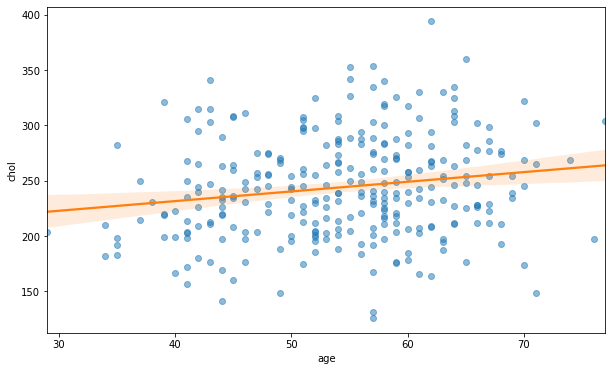

In [90]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['age'],y=df['chol'],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'})

In [91]:
slope,intercept = np.polyfit(df['age'], df['chol'],1)
print (f"intercept : {intercept:5.2f}, slope {slope:5.2f}")

intercept : 196.69, slope  0.87


In [92]:
bs_slope_reps, bs_intercept_reps = bootstrap_reps_linreg(df['age'], df['chol'],10000)

# Compute and print 95% CI for slope
print("95% confidence Interval :", np.percentile(bs_slope_reps, [2.5,97.5]))

95% confidence Interval : [0.29214378 1.43254977]


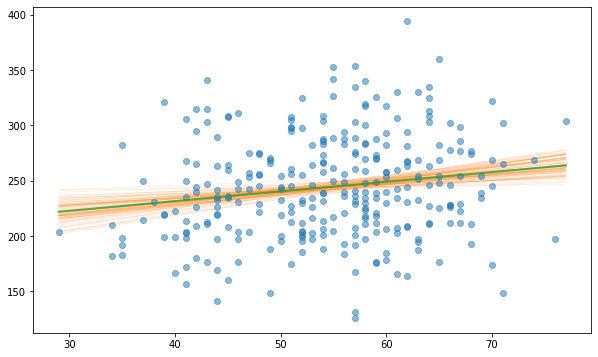

In [93]:
# Generate array of x-values for bootstrap lines: x
x = np.array([np.min(df['age']),np.max(df['age'])])

plt.figure(figsize=(10,6))
# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='C1')

# Plot the data
plt.plot(df['age'],df['chol'],marker='o',linestyle='none',alpha=0.5)
plt.plot(x, slope*x + intercept, linewidth=2, alpha=0.8, color='C2')

Text(0.5, 1.0, 'sex = Female')

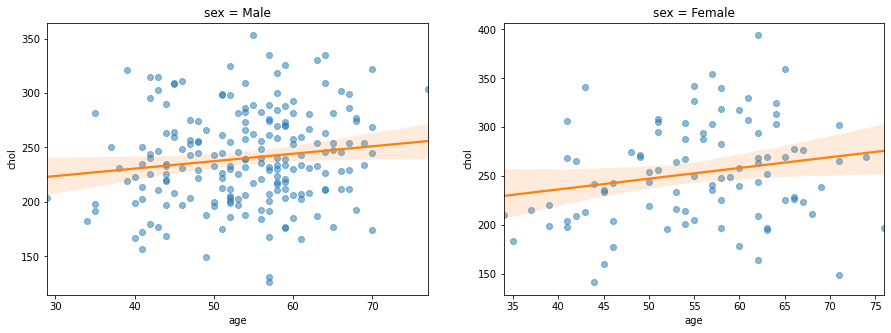

In [94]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=False)
sns.regplot(x='age',y='chol',data=df[df['sex']==1],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'}, ax=axes[0])
sns.regplot(x='age',y='chol',data=df[df['sex']==0],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'}, ax=axes[1])

axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')

In [95]:
slope,intercept = np.polyfit(df[df['sex']==1]['age'], df[df['sex']==1]['chol'],1)
print (f"For males, intercept : {intercept:5.2f}, slope {slope:5.2f}")
slope,intercept = np.polyfit(df[df['sex']==0]['age'], df[df['sex']==0]['chol'],1)
print (f"For females, intercept : {intercept:5.2f}, slope {slope:5.2f}")

For males, intercept : 203.21, slope  0.68
For females, intercept : 192.31, slope  1.10


### 2. Age vs Max Heart Rate Achieved 

<AxesSubplot:xlabel='age', ylabel='thalach'>

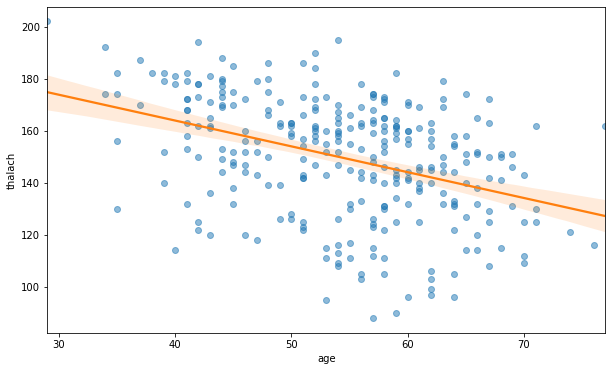

In [96]:
plt.figure(figsize=(10,6))
sns.regplot(x='age',y='thalach',data=df ,scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'})

In [97]:
slope,intercept = np.polyfit(df['age'], df['thalach'],1)
print (f"intercept : {intercept:5.2f}, slope {slope:5.2f}")

intercept : 203.59, slope -0.99


In [98]:
bs_slope_reps, bs_intercept_reps = bootstrap_reps_linreg(df['age'], df['thalach'],10000)

# Compute and print 95% CI for slope
print("95% confidence Interval :", np.percentile(bs_slope_reps, [2.5,97.5]))

95% confidence Interval : [-1.24438664 -0.73581819]


Text(0.5, 1.0, 'sex = Female')

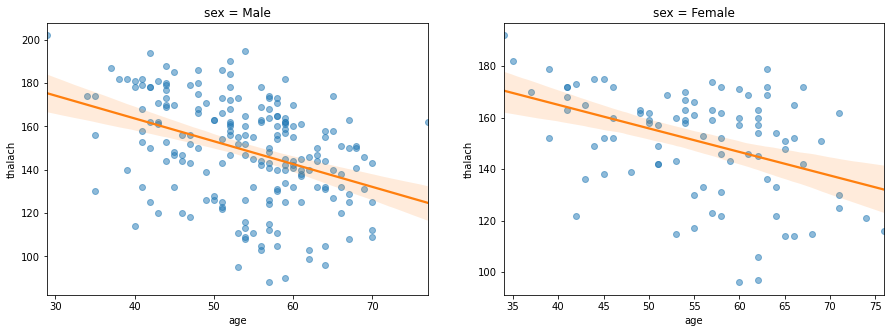

In [99]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=False)
sns.regplot(x='age',y='thalach',data=df[df['sex']==1],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'}, ax=axes[0])
sns.regplot(x='age',y='thalach',data=df[df['sex']==0],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'}, ax=axes[1])

axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')

In [100]:
slope,intercept = np.polyfit(df[df['sex']==1]['age'], df[df['sex']==1]['thalach'],1)
print (f"For males, intercept : {intercept:5.2f}, slope {slope:5.2f}")
slope,intercept = np.polyfit(df[df['sex']==0]['age'], df[df['sex']==0]['thalach'],1)
print (f"For females, intercept : {intercept:5.2f}, slope {slope:5.2f}")

For males, intercept : 205.81, slope -1.05
For females, intercept : 201.64, slope -0.92


### 3. Resting Blood Pressure vs Max Heart Rate Achieved

<AxesSubplot:xlabel='trestbps', ylabel='thalach'>

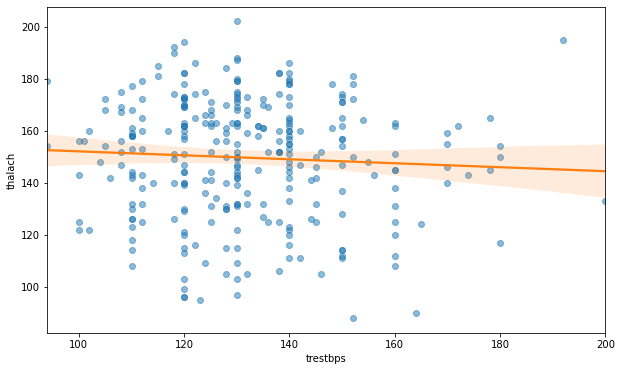

In [101]:
plt.figure(figsize=(10,6))
sns.regplot(x=df['trestbps'],y=df['thalach'],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'})

In [102]:
slope,intercept = np.polyfit(df['trestbps'], df['thalach'],1)
print (f"intercept : {intercept:5.2f}, slope {slope:5.2f}")

intercept : 159.69, slope -0.08


In [103]:
bs_slope_reps, bs_intercept_reps = bootstrap_reps_linreg(df['trestbps'], df['thalach'],10000)

# Compute and print 95% CI for slope
print("95% confidence Interval :", np.percentile(bs_slope_reps, [2.5,97.5]))

95% confidence Interval : [-0.21989427  0.06924199]


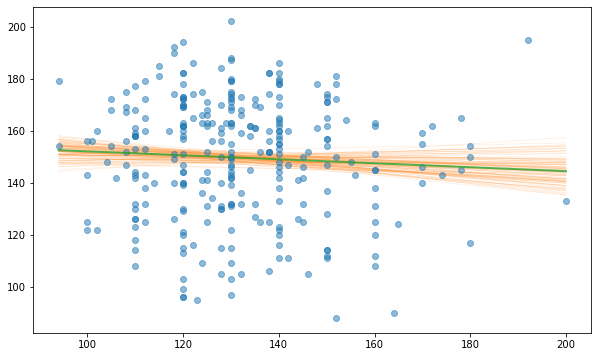

In [104]:
# Generate array of x-values for bootstrap lines: x
x = np.array([np.min(df['trestbps']),np.max(df['trestbps'])])

plt.figure(figsize=(10,6))
# Plot the bootstrap lines
for i in range(100):
    plt.plot(x, bs_slope_reps[i]*x + bs_intercept_reps[i], linewidth=0.5, alpha=0.2, color='C1')

# Plot the data
plt.plot(df['trestbps'],df['thalach'],marker='o',linestyle='none',alpha=0.5)
plt.plot(x, slope*x + intercept, linewidth=2, alpha=0.8, color='C2')

Text(0.5, 1.0, 'sex = Female')

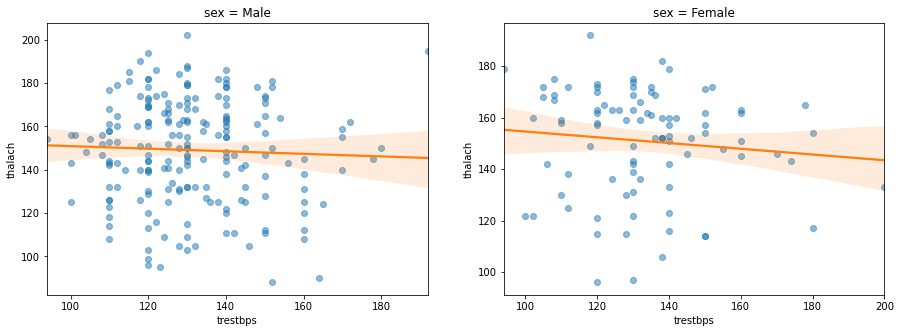

In [105]:
fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(15,5), sharex=False, sharey=False)
sns.regplot(x='trestbps',y='thalach',data=df[df['sex']==1],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'}, ax=axes[0])
sns.regplot(x='trestbps',y='thalach',data=df[df['sex']==0],scatter_kws={'alpha':0.5,'color':'C0'}, line_kws={'color':'C1'}, ax=axes[1])

axes[0].set_title('sex = Male')
axes[1].set_title('sex = Female')

In [106]:
slope,intercept = np.polyfit(df[df['sex']==1]['trestbps'], df[df['sex']==1]['thalach'],1)
print (f"For males, intercept : {intercept:5.2f}, slope {slope:5.2f}")
slope,intercept = np.polyfit(df[df['sex']==0]['trestbps'], df[df['sex']==0]['thalach'],1)
print (f"For females, intercept : {intercept:5.2f}, slope {slope:5.2f}")

For males, intercept : 156.84, slope -0.06
For females, intercept : 165.78, slope -0.11


Linear Regression Analysis between the different factors 'Age and Cholestrol level', 'Age and Max Heart Rate Achieved', 'Resting Blood Pressure vs Max Heart Rate Achieved' shows that the relationship between these factors have the same 'trend' for men and women and they behave in the same way with some difference in intercept and slope

# 5. Hypothesis Testing

Hypothesis testing is used to assess the plausibility of a hypothesis by using sample data. In this section, we will examine the relationship between target and the different factors (cholsestrol level, blood pressure, age, gender, thalassemia, chest pain).

Sine we are performing multiple hypotheses testing, the number of false-positives will increase and this needs to be corrected. Bonferroni-correction will be used by dividing alpha (0.05) by number of tests and generate an adjusted alhpa to evaluate our hypotheses 

In [107]:
adj_alpha = 0.05 / 6
print ('adjusted alpha :',adj_alpha)

adjusted alpha : 0.008333333333333333


### 1. Target and Cholsestrol Level

The hypothesis we are trying to evaluate is the following:

- null hypothesis - There is no relationship between cholestrol level and heart disease  

- alternative hypothesis - There is a relationship between cholestrol level and heart disease 



Text(0, 0.5, 'CDF')

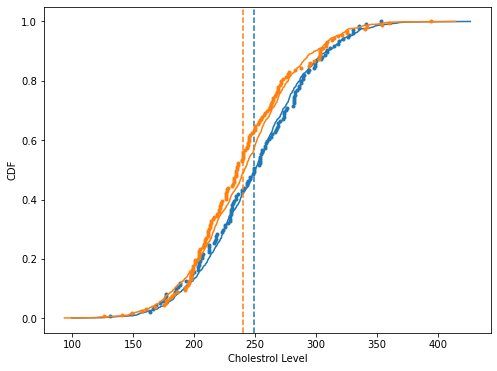

In [108]:
tgt0 = df[df['target']==0]['chol']
tgt1 = df[df['target']==1]['chol']

# The EDA shows that the mean value of cholestrol level for people with no heart disease is higher
plt.figure(figsize=(8,6))
plot_cdf(tgt0,'C0')
plot_cdf(tgt1,'C1')
plt.xlabel('Cholestrol Level')
plt.ylabel('CDF')

In [109]:
# use the independent 2-sample t-test
tst = ttest_ind(tgt0,tgt1)
print (tst)

if (tst[1] > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

Ttest_indResult(statistic=1.613316976004624, pvalue=0.10775952029115592)
p-value > 0.00833. Therefore, we fail to reject the null hypothesis


In [110]:
# Compute difference of mean between the two groups
mean_diff = np.mean(tgt0) - np.mean(tgt1)
mean_diff

8.666760536937943

In [111]:
# Draw 10000 bootstrap replicates
bs_replicates = bootstrap_reps(tgt0, tgt1,1000)

# Compute the confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print ('Confidence interval = ', conf_int)

Confidence interval =  [-11.00752605  10.09673214]


In [112]:
# Draw 10000 permutation replicates
perm_replicates = perm_reps(tgt0, tgt1,10000)

# Compute p-value
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)
print('p-value =', p)
if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

p-value = 0.054
p-value > 0.00833. Therefore, we fail to reject the null hypothesis


### 2. Target and Blood pressure

The hypothesis we are trying to evaluate is the following:

- null hypothesis - There is no relationship between blood pressure and heart disease  

- alternative hypothesis - There is a relationship between blood pressure and heart disease 


Text(0, 0.5, 'CDF')

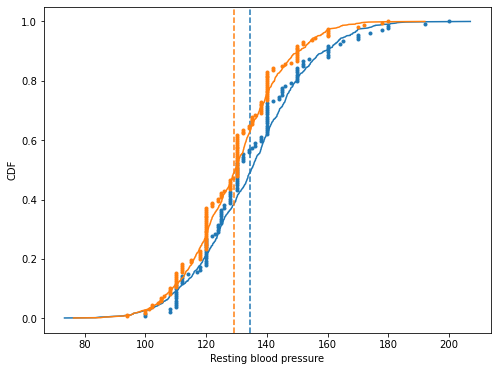

In [113]:
tgt0 = df[df['target']==0]['trestbps']
tgt1 = df[df['target']==1]['trestbps']

# The EDA shows that the mean value of blood pressure for people with no heart disease is higher
plt.figure(figsize=(8,6))
plot_cdf(tgt0,'C0')
plot_cdf(tgt1,'C1')
plt.xlabel('Resting blood pressure')
plt.ylabel('CDF')

In [114]:
# use the independent 2-sample t-test
tst = ttest_ind(tgt0,tgt1)
print (tst)

if (tst[1] > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

Ttest_indResult(statistic=2.533150099403503, pvalue=0.011829491640554824)
p-value > 0.00833. Therefore, we fail to reject the null hypothesis


In [115]:
# Draw 10000 bootstrap replicates
bs_replicates = bootstrap_reps(tgt0, tgt1,1000)

# Compute the confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print ('Confidence interval = ', conf_int)

Confidence interval =  [-4.09394302  4.08834718]


In [116]:
# Draw 10000 permutation replicates
perm_replicates = perm_reps(tgt0, tgt1,10000)

# Compute p-value
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)
print('p-value =', p)
if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

p-value = 0.0
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


T-test and permutation test are showing different results. T-test assumes that data is normally distributed with equal variances in the two arms. This is not the case with our data since we have outliers. Overall, permutation is superior and outperforms t-test.

Therefore, we will assume the permutation test results to be more accurate

### 3. Target and Age

The hypothesis we are trying to evaluate is the following:

- null hypothesis - There is no relationship between age and heart disease  

- alternative hypothesis - There is a relationship between gender and heart disease 



Text(0, 0.5, 'CDF')

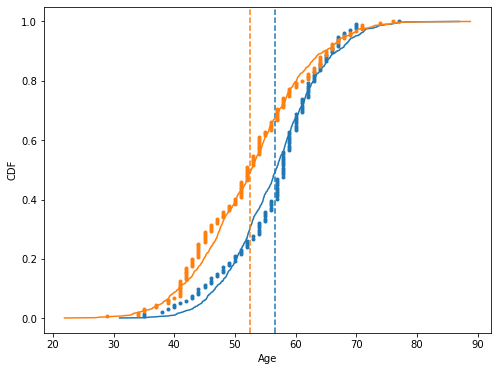

In [117]:
tgt0 = df[df['target']==0]['age']
tgt1 = df[df['target']==1]['age']

# The EDA shows that the mean value of blood pressure for people with no heart disease is higher
plt.figure(figsize=(8,6))
plot_cdf(tgt0,'C0')
plot_cdf(tgt1,'C1')
plt.xlabel('Age')
plt.ylabel('CDF')

In [118]:
# use the independent 2-sample t-test
tst = ttest_ind(tgt0,tgt1)
print (tst)
if (tst[1] > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

Ttest_indResult(statistic=3.980752362559652, pvalue=8.682224828607066e-05)
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


In [119]:
# Draw 10000 bootstrap replicates
bs_replicates = bootstrap_reps(tgt0, tgt1,1000)

# Compute the confidence interval
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print ('Confidence interval = ', conf_int)

Confidence interval =  [-1.91380832  1.86723576]


In [120]:
# Draw 10000 permutation replicates
perm_replicates = perm_reps(tgt0, tgt1,10000)

# Compute p-value
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)
print('p-value =', p)
if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

p-value = 0.0
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


### 4. Target and Gender  

** The Chi Square statistic is commonly used for testing relationships between categorical variables.  The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent. ** 


The hypothesis we are trying to evaluate is the following:

- null hypothesis - There is no relationship between gender and heart disease 

- alternative hypothesis - There is a relationship between gender and heart disease

In [121]:
from scipy.stats import chi2, chi2_contingency

crosstab = pd.crosstab(df["target"],df["sex"])
print(crosstab, "\n")
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi2 value= {:5.2f}\np-value= {} \nDegrees of freedom= {}".format(chi2, p, dof))

if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

sex      0    1
target         
0       22  112
1       70   89 

Chi2 value= 24.46
p-value= 7.571818256858921e-07 
Degrees of freedom= 1
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


In [122]:
# Draw 10000 permutation replicates
perm_replicates = perm_reps(tgt0, tgt1,10000)

# Compute p-value
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)
print('p-value =', p)

if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    


p-value = 0.0
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


### 5. Target and Thalassemia

** The Chi Square statistic is commonly used for testing relationships between categorical variables.  The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent. ** 


The hypothesis we are trying to evaluate is the following:

- null hypothesis - There is no relationship between Thalassemia and heart disease 

- alternative hypothesis - There is a relationship between Thalassemia and heart disease

In [123]:
crosstab = pd.crosstab(df["target"],df["thal"])
print(crosstab, "\n")
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi2 value= {:5.2f}\np-value= {} \nDegrees of freedom= {}".format(chi2, p, dof))

if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

thal    0   1    2   3
target                
0       1  12   35  86
1       1   6  126  26 

Chi2 value= 84.06
p-value= 4.136848218892871e-18 
Degrees of freedom= 3
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


In [124]:
# Draw 10000 permutation replicates
perm_replicates = perm_reps(tgt0, tgt1,10000)

# Compute p-value
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)
print('p-value =', p)

if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.2f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.2f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

p-value = 0.0
p-value <=  0.01. Therefore, there is sufficient evidence to reject the null hypothesis


### 6. Target and Chest Pain 

** The Chi Square statistic is commonly used for testing relationships between categorical variables.  The null hypothesis of the Chi-Square test is that no relationship exists on the categorical variables in the population; they are independent. ** 


The hypothesis we are trying to evaluate is the following:

- null hypothesis - There is no relationship between chest pain and heart disease 

- alternative hypothesis - There is a relationship between chest pain and heart disease

In [125]:
crosstab = pd.crosstab(df["target"],df["thal"])
print(crosstab, "\n")
chi2, p, dof, expected = chi2_contingency(crosstab)
print("Chi2 value= {:5.2f}\np-value= {} \nDegrees of freedom= {}".format(chi2, p, dof))
if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

thal    0   1    2   3
target                
0       1  12   35  86
1       1   6  126  26 

Chi2 value= 84.06
p-value= 4.136848218892871e-18 
Degrees of freedom= 3
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


In [126]:
# Draw 10000 permutation replicates
perm_replicates = perm_reps(tgt0, tgt1,10000)

# Compute p-value
p = np.sum(perm_replicates >= mean_diff) / len(perm_replicates)
print('p-value =', p)

if (p > adj_alpha):
    print (f"p-value > {adj_alpha:5.5f}. Therefore, we fail to reject the null hypothesis")
else:
    print (f"p-value <= {adj_alpha:5.5f}. Therefore, there is sufficient evidence to reject the null hypothesis")    

p-value = 0.0
p-value <= 0.00833. Therefore, there is sufficient evidence to reject the null hypothesis


In the hypothesis Testing section, we performed different tests to evalaute the relationship between target and the various factors (cholsestrol level, blood pressure, age, gender, thalassemia, chest pain).

The tests indicates that there is sufficient evidence to accept that there is relationship between target and the different factors (blood pressure, age, gender, thalassemia, chest pain) except for the cholsestrol level where there is no sufficient evidence to reject the null hypothesis


## 5. Conclusion 

In this analysis, we looked at different factors and tried to understand the relationship between heart disease and these factors. We also tried to understand the similarities and differences between men and women when it comes to heart diseases.

The analysis shows clear difference in some factors such as age, chest pain, Thalassemia ..etc. This can be used to create awareness among men and women which hopefully can save lives